In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math
import os
import traceback
import numpy as np

current_directory  = os.getcwd()
parent_folder = os.path.dirname(os.path.dirname(current_directory))
print(parent_folder)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.options.mode.chained_assignment = None

plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'legend.framealpha': 0.6})
#plt.rcParams.update({'legend.edgecolor': '0'})
plt.rcParams.update({'legend.shadow': True})

d:\Gitlab\machine-learning


In [4]:
def inputs_flat(row):
    flat_list = []
    for lst in row:
        flat_list.extend(lst)
    return flat_list

In [5]:
try:
    path = fr'{parent_folder}\Acetate\Data\final\Run_4_FERM\Ensemble\All_data_metrics_ensemble.csv'
    df = pd.read_csv(filepath_or_buffer = path)
    df.drop('Weights', axis=1, inplace=True)
    df['Inputs'] = df['Inputs'].apply(eval)
    df['Ensemble_size'] = df['Inputs'].apply(len)
    df['Flat_inputs'] = df['Inputs'].apply(inputs_flat)

except Exception as e:
    traceback.print_exc()

inputs = []
for idx in range(df.shape[0]):
    inputs.extend(df['Flat_inputs'][idx])

uniq_inputs = list(set(inputs))
prob_df = pd.DataFrame(columns=uniq_inputs)
prob_df.drop('Protein', axis = 1, inplace=True)

for idx in range(df.shape[0]):
    prob_df.loc[idx] = Counter(df['Flat_inputs'][idx])

prob_df.fillna(0, inplace=True)
prob_df = prob_df.divide(df['Ensemble_size'], axis=0)

display(df)
display(prob_df)

,Test_ID,Inputs,MMSE,MAE,MSE,RMSE,RSS,R2,Model_id,Ensemble_size,Flat_inputs
0,0,"[[dBiomassEst, dCarbon_Feed, Induction, Cumula...",1.006367,0.003131,0.000104,0.010219,0.017229,0.994245,0,1,"[dBiomassEst, dCarbon_Feed, Induction, Cumulat..."
1,1,"[[dBiomassEst, dCarbon_Feed, Induction, Cumula...",1.006145,0.003023,0.000100,0.009991,0.016471,0.994498,0,2,"[dBiomassEst, dCarbon_Feed, Induction, Cumulat..."
2,2,"[[dBiomassEst, dCarbon_Feed, Induction, Cumula...",1.005992,0.002950,0.000092,0.009579,0.015141,0.994942,0,3,"[dBiomassEst, dCarbon_Feed, Induction, Cumulat..."
3,3,"[[dBiomassEst, dCarbon_Feed, Induction, Cumula...",1.005772,0.002843,0.000087,0.009313,0.014312,0.995219,0,4,"[dBiomassEst, dCarbon_Feed, Induction, Cumulat..."


,Time,CPR,Induction,BiomassEst,Biomass0,miuSimp,CumulativeAge,BioWeight,Age,dBiomassEst,dCarbon_Feed,Carbon_Feed
0,0.00,0.00,1.0,0.000000,0.00,1.000000,1.000000,0.00,0.000000,1.000000,1.000000,0.000000
1,0.00,0.00,1.0,0.500000,0.00,1.000000,1.000000,0.00,0.500000,0.500000,1.000000,0.000000
2,0.00,0.00,1.0,0.666667,0.00,0.666667,0.666667,0.00,0.333333,0.333333,0.666667,0.333333
3,0.25,0.25,1.0,0.500000,0.25,0.500000,0.500000,0.25,0.500000,0.250000,0.750000,0.250000


Input probabilities for chart

In [6]:
prob_df2 = prob_df.copy()
prob_df2['Latent biomass change\n/Latent biomass'] = prob_df2['BiomassEst'].add(prob_df2['dBiomassEst'])
prob_df2['Carbon intake change\n/Carbon intake'] = prob_df2['Carbon_Feed'].add(prob_df2['dCarbon_Feed'])
prob_df2['Latant cumulative age\n/ Latent age'] = prob_df2['Age'].add(prob_df2['CumulativeAge'])

prob_df2 = prob_df2[['Latent biomass change\n/Latent biomass',	'Carbon intake change\n/Carbon intake', 'Latant cumulative age\n/ Latent age', 'Biomass0', 'miuSimp', 'BioWeight', 'Induction', 'CPR']]
#['Latent specific\n growth rate','Latent cumulative\n age/Latent age', 'Feeding glucose change/\nFeeding glucose','Broth weight','CPR','Induction','Initial biomass','Latent biomass']
prob_df2['Initial biomass'] = prob_df2['Biomass0']
prob_df2['Latent specific\n growth rate'] = prob_df2['miuSimp']
prob_df2['Broth weight'] = prob_df2['BioWeight']
prob_df2.drop(columns=['Biomass0', 'miuSimp', 'BioWeight'], inplace=True)

last_row = prob_df2.iloc[-1]
sorted_columns = last_row.sort_values(ascending=False).index
prob_df2 = prob_df2[sorted_columns]
display(prob_df2)

,Carbon intake change\n/Carbon intake,Latant cumulative age\n/ Latent age,Induction,Latent biomass change\n/Latent biomass,Latent specific\n growth rate,CPR,Initial biomass,Broth weight
0,1.0,1.0,1.0,1.00,1.000000,0.00,0.00,0.00
1,1.0,1.5,1.0,1.00,1.000000,0.00,0.00,0.00
2,1.0,1.0,1.0,1.00,0.666667,0.00,0.00,0.00
3,1.0,1.0,1.0,0.75,0.500000,0.25,0.25,0.25


Input probability bar chart

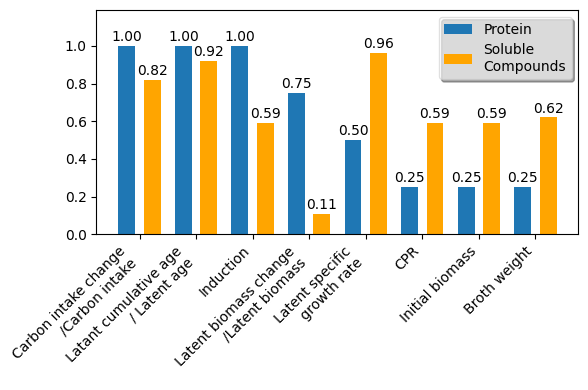

In [19]:
acetate_prob = [0.82, 0.92, 0.59, 0.11, 0.96, 0.59, 0.59, 0.62]
acetate_names = ['Feeding glucose change/\nFeeding glucose', 'Latent cumulative\n age/Latent age','Induction', 'Latent biomass change\n/Latent biomass', 'Latent specific\n growth rate','CPR','Initial biomass','Broth weight']

bar_width = 0.55
spacing = 0

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(np.arange(prob_df2.shape[1]) - bar_width/2+0.05, prob_df2.iloc[-1], width=0.3, label='Protein')
bars2 = ax.bar(np.arange(prob_df2.shape[1]) + bar_width/2-0.05, acetate_prob, width=0.3, label='Soluble\nCompounds', color = 'orange')

ax.set_xticks(np.arange(prob_df2.shape[1]))
ax.set_xticklabels(prob_df2.columns, rotation=45, ha='right')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper right')

ax.set_ylim(0, 1.19)

for bar, prob in zip(bars, prob_df2.iloc[-1]):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{prob:.2f}', ha='center', va='bottom')
for bar, prob in zip(bars2, acetate_prob):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{prob:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Entropy Calculation

In [27]:
df_log2 = prob_df.map(lambda x: 0 if x == 0 else x * math.log2(x))
df_log2['entrophy'] = df_log2.sum(axis=1)
df_log2['entrophy'] = df_log2['entrophy'] * (-1)

display(df_log2)

,Time,CPR,Induction,BiomassEst,Biomass0,miuSimp,CumulativeAge,BioWeight,Age,dBiomassEst,dCarbon_Feed,Carbon_Feed,entrophy
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.000000
1,0.0,0.0,0.0,-0.500000,0.0,0.000000,0.000000,0.0,-0.500000,-0.500000,0.000000,0.000000,1.500000
2,0.0,0.0,0.0,-0.389975,0.0,-0.389975,-0.389975,0.0,-0.528321,-0.528321,-0.389975,-0.528321,3.144863
3,-0.5,-0.5,0.0,-0.500000,-0.5,-0.500000,-0.500000,-0.5,-0.500000,-0.500000,-0.311278,-0.500000,5.311278


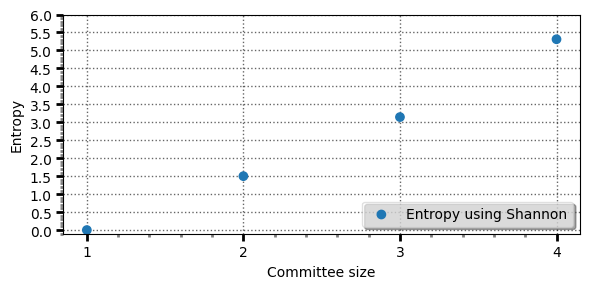

In [28]:
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

entropy_color = ['magenta' if c == 5 else 'C0' for c in range(len(df_log2['entrophy']))]

fig = plt.figure(num=3, figsize=(6, 3))
plt.ylim(-0.1, 6)
scatter1 = plt.scatter(df['Ensemble_size'], df_log2['entrophy'], zorder=2, label = "Entropy using Shannon", c = entropy_color) #, 
plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=5)
plt.tick_params(which='minor', length=2.5, color='grey')
plt.grid(color='black', linestyle=':', linewidth=1, alpha=0.6)
plt.xlabel('Committee size')
plt.ylabel('Entropy')

legend_elements = [scatter1]
legend_labels = ["Entropy using Shannon"]

plt.legend(legend_elements, legend_labels, loc='lower right', numpoints=1)

plt.tight_layout()
plt.show()

The correlation between MAE and committee size

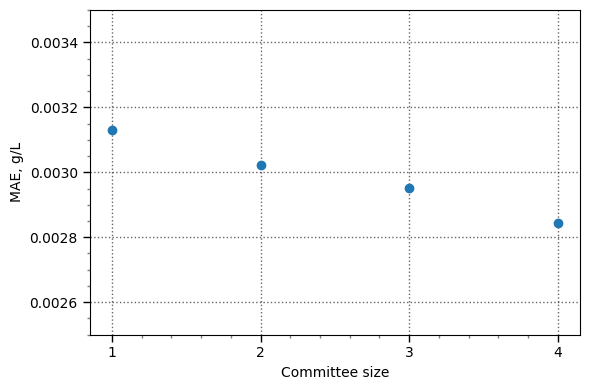

In [58]:
fig = plt.figure(num=2, figsize=(6, 4))
plt.ylim(0.0025, 0.0035)

plt.scatter(df['Ensemble_size'], df["MAE"], zorder=2)

plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
#plt.gca().yaxis.set_major_locator(MultipleLocator(0.005))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.tick_params(which='both', width=1)
plt.tick_params(which='major', length=5)
plt.tick_params(which='minor', length=2.5, color='grey')
plt.grid(color='black', linestyle=':', linewidth=1, alpha=0.6)
plt.xlabel('Committee size')
plt.ylabel('MAE, g/L')
#plt.legend(loc = 'upper right')

plt.tight_layout()

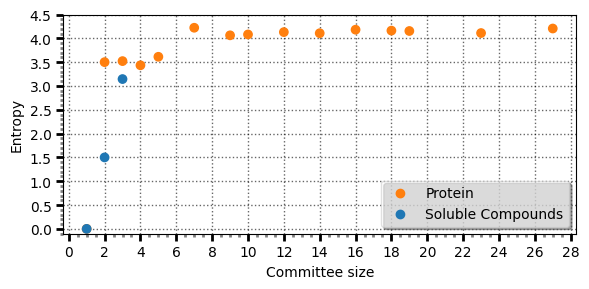

In [38]:
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

committee_size = [1, 2,	3,	4,	5,	7,	9,	10,	12,	14,	16,	18,	19,	23,	27]
entropy = [0, 3.5, 3.521858008,	3.433834373, 3.612573616, 4.221959267, 4.062981627,	4.081088322, 4.130384643, 4.107244395, 4.18108883, 4.161818913,	4.153802681, 4.110912052, 4.205841262]
entropy_color2 = ['C1' for c in range(len(entropy))]
entropy_color = ['C0' for c in range(len(df_log2['entrophy']))]

fig = plt.figure(num=3, figsize=(6, 3))
plt.ylim(-0.1, 4.5)
scatter1 = plt.scatter(committee_size, entropy, zorder=2, label = "Soluble Compounds", c = entropy_color2) #, 
scatter2 = plt.scatter(df['Ensemble_size'], df_log2['entrophy'], zorder=2, label = "Protein", c = entropy_color)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=5)
plt.tick_params(which='minor', length=2.5, color='grey')
plt.grid(color='black', linestyle=':', linewidth=1, alpha=0.6)
plt.xlabel('Committee size')
plt.ylabel('Entropy')

legend_elements = [scatter1, scatter2, Line2D([], [], color='none', marker='o', markerfacecolor="magenta", markeredgecolor='magenta')]
legend_labels = ["Soluble Compounds", "Protein"]

plt.legend(legend_elements, legend_labels, loc='lower right', numpoints=1)

plt.tight_layout()